

## Assignment 2: Data, Grammar and Engineering

**AMS MADE YMS31303**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>

---



## Question 1

We will work with data from the Guardian's version of [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

Write a Python code snippet using IPython.display to embed this Google Sheet directly into a Jupyter notebook for easy reference and interaction.

In [10]:
from IPython.display import IFrame
GoogleDocURL = "https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en&gid=1#gid=1"
IFrame(GoogleDocURL, width=800, height=600)


## Question 2
a) Save the csv file to your compluter and Load the data in Tab "TOTAL Casualties".

b) Display the first 5 rows of the dataset using .head().

c) Extract the column names and create a dictionary where each column name is the key, and the first value in that column is the value.

In [49]:
import pandas as pd

f = 'd:/AMS/Metropolitan Data 1/lab-01/TOTAL CASUALTIES.csv'
db = pd.read_csv(f)
db.head(5)
ColNames = db.columns.tolist()
ColDictionary = {column: db[column].iloc[0] for column in db.columns}
print(ColDictionary)

{'Casualties detailed in the war logs, month by month': 'Year', 'Unnamed: 1': 'Month', 'Unnamed: 2': 'Taliban', 'Unnamed: 3': 'Civilians', 'Unnamed: 4': 'Afghan forces', 'Unnamed: 5': 'Nato (detailed in spreadsheet)', 'Unnamed: 6': 'Nato - official figures'}


## Question 3
a) Plot a histogram of any numeric column from the dataset.

b) Use a kernel density plot (KDE) to visualize the distribution of another numeric column.

c) Create a bar chart of a categorical variable and discuss how the plot changes if you switch to a horizontal bar plot.

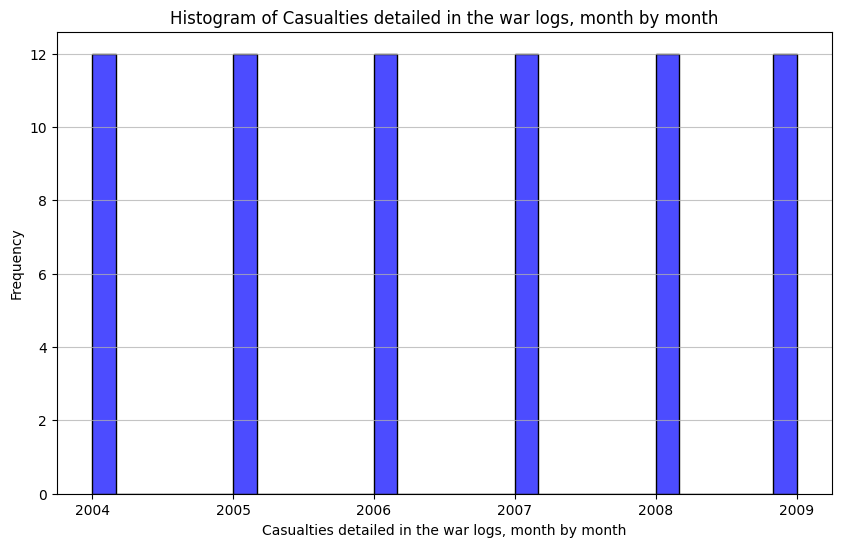

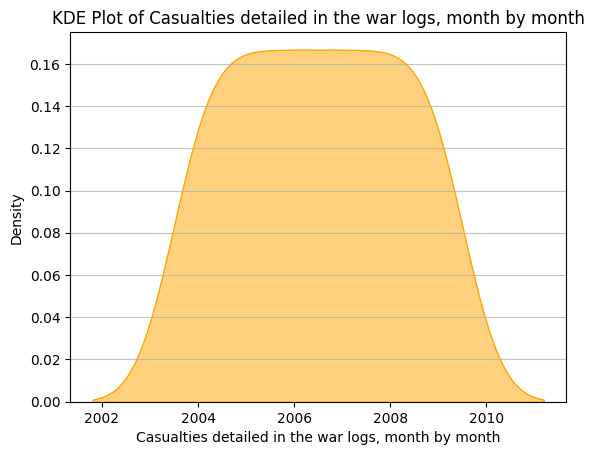

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
f = 'd:/AMS/Metropolitan Data 1/lab-01/TOTAL CASUALTIES.csv'
db = pd.read_csv(f)
for column in db.columns:  
    # Convert to numeric, coercing errors to NaN  
    db[column] = pd.to_numeric(db[column], errors='coerce')  

# Identify numeric columns in the DataFrame after conversion  
numeric_columns = db.select_dtypes(include=['number']).columns  

# Check if there are any numeric columns  
if len(numeric_columns) == 0:  
    print("There are no numeric columns in the dataset.")  
else:  
    # Choose a numeric column to plot.    
    column_to_plot = numeric_columns[0]  

    # Plot a histogram of the selected numeric column.  
    plt.figure(figsize=(10, 6))  # Set the figure size  
    sns.histplot(db[column_to_plot], bins=30, color='blue', kde=False, alpha=0.7)  # Plot histogram  
    plt.title(f'Histogram of {column_to_plot}')  
    plt.xlabel(column_to_plot)  
    plt.ylabel('Frequency')  
    plt.grid(axis='y', alpha=0.75)  # Add grid for better readability  
    plt.show()  # Display the plot  

    sns.kdeplot(db[column_to_plot], color='orange', fill=True, alpha=0.5)  

    # Add titles and labels  
    plt.title(f'KDE Plot of {column_to_plot}')  
    plt.xlabel(column_to_plot)  
    plt.ylabel('Density')  
    plt.grid(axis='y', alpha=0.75)  

    # Display the plot  
    plt.show()  



## Question 4
a) Write a loop that iterates through each row of a DataFrame and prints the value of one specific column.

b) Modify the loop so that it extracts rows where a numeric column value is greater than a threshold and stores these rows in a new DataFrame.

In [93]:
f = 'd:/AMS/Metropolitan Data 1/lab-01/TOTAL CASUALTIES.csv'  
db = pd.read_csv(f)
print(db.columns) 

column_name = 'Unnamed: 6'  
  
for index, row in db.iterrows():  
    print(row[column_name]) 

db[numeric_column_name] = pd.to_numeric(db['Unnamed: 6'], errors='coerce')  
threshold = 10  

# Initialize a list to store the filtered rows  
filtered_rows = []  

# Iterate through each row and check the condition  
for index, row in db.iterrows():  
    if row[numeric_column_name] > threshold:  
        filtered_rows.append(row)  

# Create a new DataFrame from the filtered rows  
new_db = pd.DataFrame(filtered_rows)  

print(new_db)


Index(['Casualties detailed in the war logs, month by month', 'Unnamed: 1',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')
Nato - official figures
11
2
3
3
9
5
2
4
4
8
7
2
2
3
6
19
4
29
2
33
12
10
7
4
1
17
13
5
17
22
19
29
38
17
9
4
2
18
10
20
25
24
29
34
24
15
22
9
14
7
20
14
23
46
30
46
37
19
12
27
25
25
28
14
27
38
76
77
70
74
32
35
nan
   Casualties detailed in the war logs, month by month Unnamed: 1 Unnamed: 2  \
1                                                2004     January         15   
16                                               2005       April        118   
18                                               2005        June        143   
20                                               2005      August         90   
21                                               2005   September         89   
26                                               2006    February         12   
27                                           

## Question 5
a) Crate a list containing the names "Civilians" and "Afghan forces"

b) From the imported data keep the the values from these two columns only. Keep in mind that "Year" and "Month" identify each column and sould remain in the dataset.

c) Obtain a monthly total count of casualties for these two groups and create a line and a bar plot of them.


In [107]:
# Load the dataset  
f = 'd:/AMS/Metropolitan Data 1/lab-01/TOTAL CASUALTIES.csv'   
db = pd.read_csv(f, header=1) 

# Check the columns in the DataFrame  
print("Columns in the DataFrame:", db.columns.tolist())

names_list = ["Civilians", "Afghan forces"]
 
filtered_db = db[['Year', 'Month'] + names_list]
print(filtered_db) 


Columns in the DataFrame: ['Year', 'Month', 'Taliban', 'Civilians', 'Afghan forces', 'Nato (detailed in spreadsheet)', 'Nato - official figures']
      Year      Month Civilians Afghan forces
0   2004.0    January        51            23
1   2004.0   February         7             4
2   2004.0      March         2           NaN
3   2004.0      April         3            19
4   2004.0        May        29            56
..     ...        ...       ...           ...
68  2009.0  September       197           133
69  2009.0    October       107            86
70  2009.0   November       120            69
71  2009.0   December        87            65
72     NaN      24498     4,024         3,820

[73 rows x 4 columns]
